In [198]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import math

In [199]:
search_ffi = lk.search_tesscut('TIC 21398893')

In [200]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 60,2022,TESScut,158,TIC 21398893,0.0


In [201]:
search_tpf = lk.search_targetpixelfile('TIC 21398893')

In [202]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 60,2022,SPOC,120,21398893,0.0


In [203]:
search_lcf = lk.search_lightcurve('TIC 21398893')

In [204]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 60,2022,SPOC,120,21398893,0.0


In [205]:
search_lcf_refined = lk.search_lightcurve('TIC 21398893', author="SPOC", exptime=120)

In [206]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 60,2022,SPOC,120,21398893,0.0


In [207]:
lcf = search_lcf_refined.download_all()

In [208]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 21398893" SECTOR=60 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [209]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2936.9084399658923,———,———,5.0966409e-03,1230803,1139.54114,1851.71376,2.9755434e+05,5.8759216e+01,4.2464810e+03,9.0183821e+00,———,———,1000000000000000,———,———,———,———,1139.54114,1.9645490e-04,1851.71376,1.7616569e-04,-6.3367233e-02,1.1490680e-01
2936.909828889544,———,———,5.0966763e-03,1230804,1139.53571,1851.71267,2.9749353e+05,5.8754288e+01,4.2333071e+03,9.0165358e+00,———,———,1000000000000000,———,———,———,———,1139.53571,1.9627636e-04,1851.71267,1.7623244e-04,-6.8712220e-02,1.1365219e-01
2936.91121781273,———,———,5.0967112e-03,1230805,1139.54185,1851.71271,2.9756594e+05,5.8758068e+01,4.2376719e+03,9.0081787e+00,———,———,1000000000000000,———,———,———,———,1139.54185,1.9624218e-04,1851.71271,1.7622921e-04,-6.2491052e-02,1.1361212e-01
2936.912606736382,———,———,5.0967466e-03,1230806,1139.53688,1851.71213,2.9756744e+05,5.8764248e+01,4.2427749e+03,9.0268288e+00,———,———,1000000000000000,———,———,———,———,1139.53688,1.9633057e-04,1851.71213,1.7620108e-04,-6.7758538e-02,1.1312947e-01
2936.913995659568,———,———,5.0967815e-03,1230807,1139.53925,1851.71344,2.9744975e+05,5.8755432e+01,4.2578003e+03,9.0286732e+00,———,———,1000000000000000,———,———,———,———,1139.53925,1.9638400e-04,1851.71344,1.7630300e-04,-6.5750271e-02,1.1463893e-01
2936.915384582754,———,———,5.0968165e-03,1230808,1139.53523,1851.71517,2.9750738e+05,5.8755577e+01,4.2386421e+03,9.0138569e+00,———,———,1000000000000000,———,———,———,———,1139.53523,1.9635788e-04,1851.71517,1.7619586e-04,-6.8411998e-02,1.1594796e-01
2936.9167735064057,———,———,5.0968518e-03,1230809,1139.53914,1851.71509,2.9751578e+05,5.8755108e+01,4.2413091e+03,9.0149097e+00,———,———,1000000000000000,———,———,———,———,1139.53914,1.9631666e-04,1851.71509,1.7632116e-04,-6.5296255e-02,1.1627511e-01
2936.9181624295925,———,———,5.0968868e-03,1230810,1139.53873,1851.70912,2.9748856e+05,5.8756268e+01,4.2393032e+03,9.0185785e+00,———,———,1000000000000000,———,———,———,———,1139.53873,1.9625326e-04,1851.70912,1.7631431e-04,-6.5902121e-02,1.1022792e-01


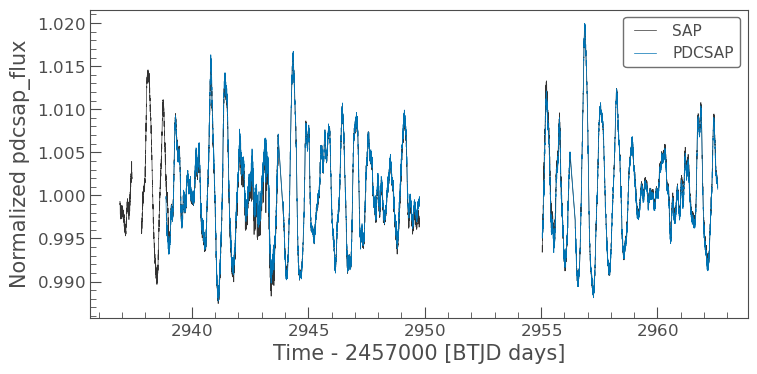

In [210]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

Text(0.5, 1.0, 'PDCSAP light curve of TIC 21398893')

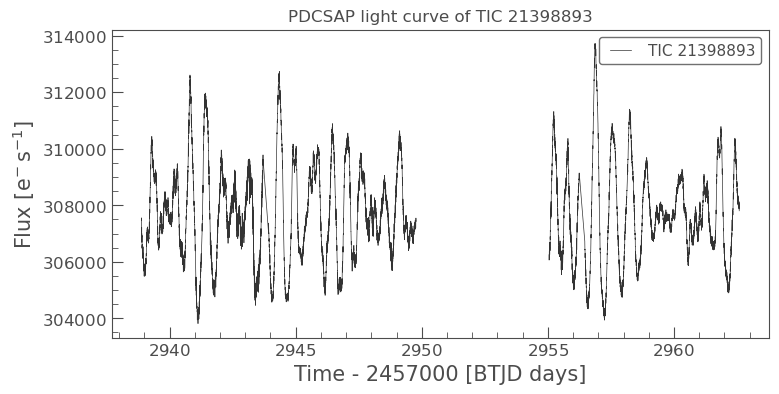

In [211]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of TIC 21398893")

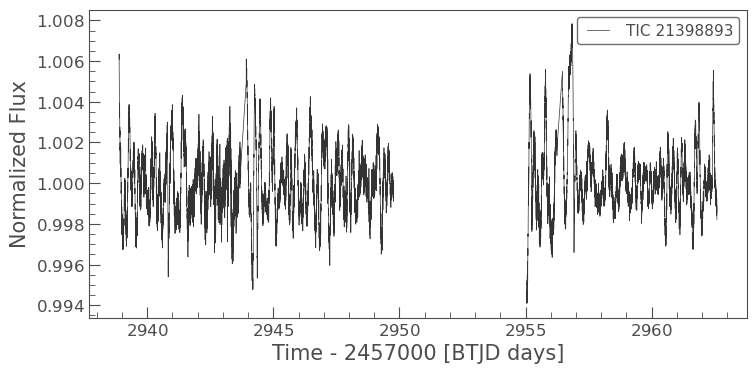

In [212]:
flat_lc = lcf[0].flatten(window_length=401)
flat_lc.plot();

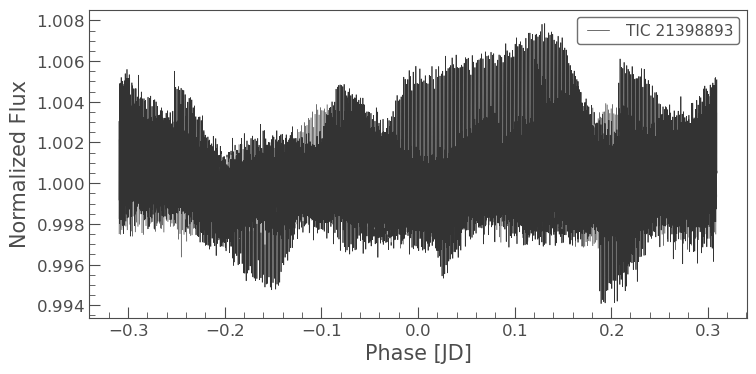

In [213]:
folded_lc = flat_lc.fold(period=0.619)
folded_lc.plot();

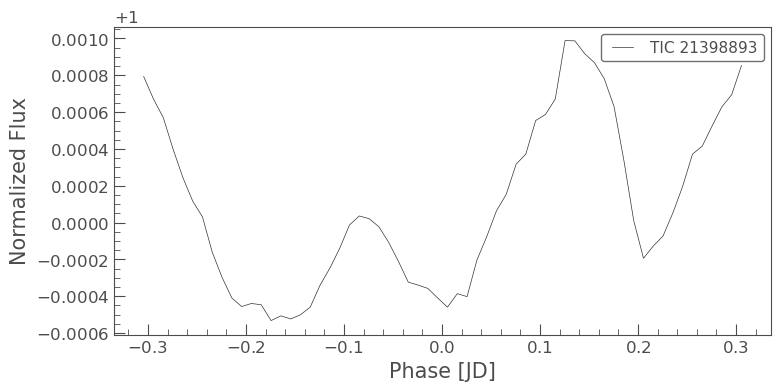

In [214]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot();

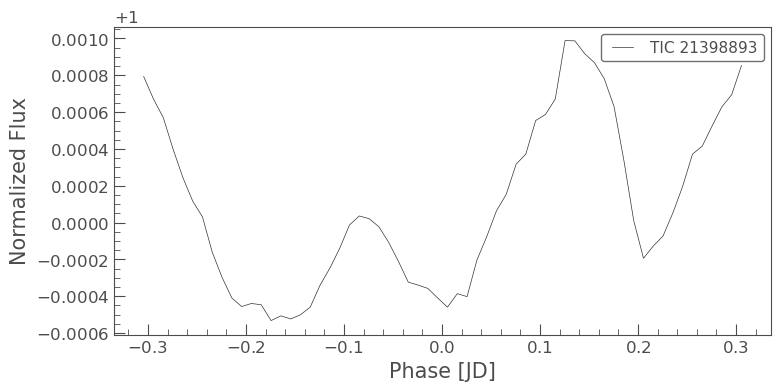

In [215]:
lcf[0].flatten(window_length=401).fold(period=0.619).bin(time_bin_size=0.01).plot();

In [216]:
lcf[0].interact_bls()

In [217]:
ffi_data = search_ffi[0].download(cutout_size=10)

<AxesSubplot:title={'center':'Target ID: TIC 21398893, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

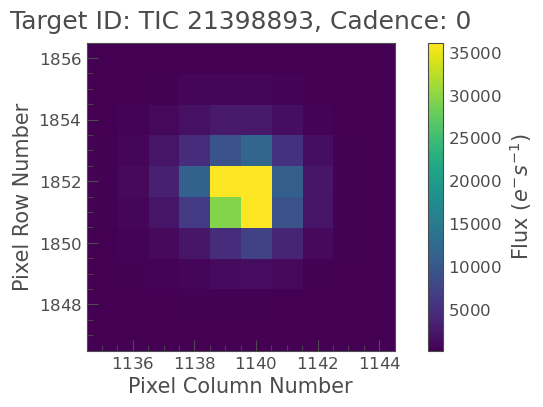

In [218]:
ffi_data.plot()

In [219]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

11

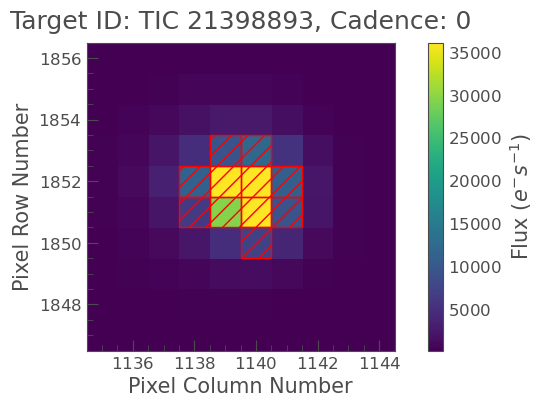

In [220]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [221]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [222]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
2936.9090406535583,251992.953125,41.05683517456055,1139.581119277641,1851.680986831911,0,0
2936.9113555260014,251937.140625,41.05111312866211,1139.5805141389744,1851.6789154922046,1,0
2936.913670397979,251923.4375,41.05103302001953,1139.5789341961224,1851.679707420952,2,0
2936.9159852704215,251948.75,41.05059814453125,1139.5807920540635,1851.6768548209675,3,0
2936.918300142398,251871.96875,41.045406341552734,1139.5777066423752,1851.683716038906,4,0
2936.920615014841,251679.046875,41.02957534790039,1139.5804419089318,1851.6804245842718,5,0
2936.922929886818,251764.546875,41.0378532409668,1139.5798811254451,1851.6770725617052,6,0
2936.92524475926,251661.640625,41.03030014038086,1139.5800807655305,1851.6801350880662,7,0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

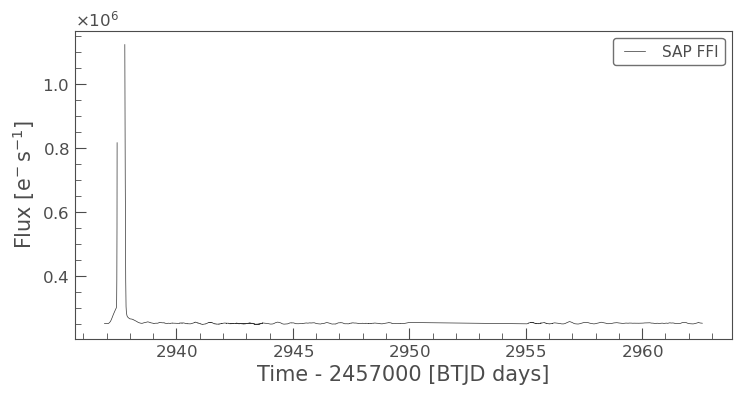

In [223]:
ffi_lc.plot(label="SAP FFI")

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

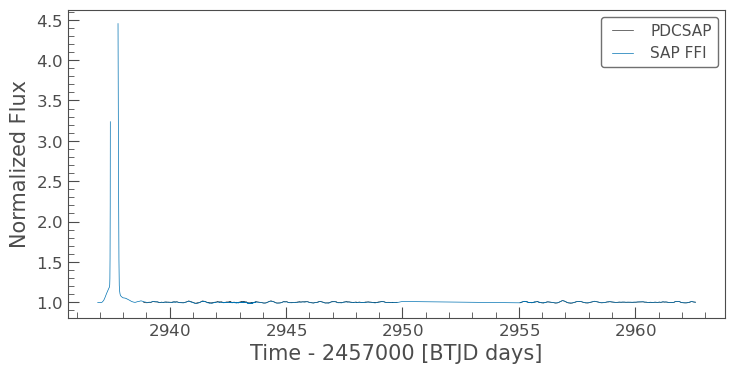

In [224]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [225]:
ffi_data.interact()

In [226]:
ffi_data.interact_sky()

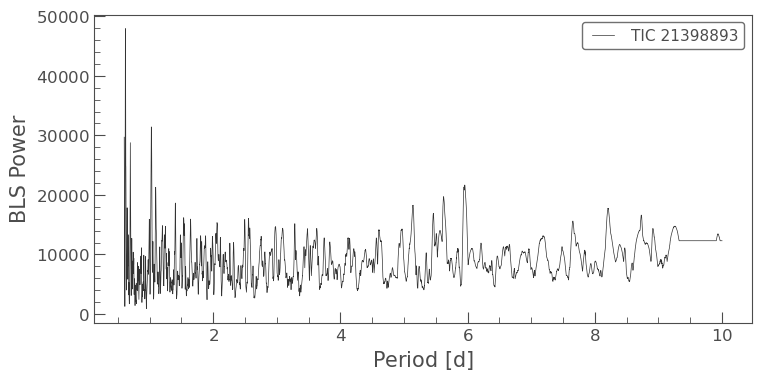

In [227]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [228]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 0.619 d


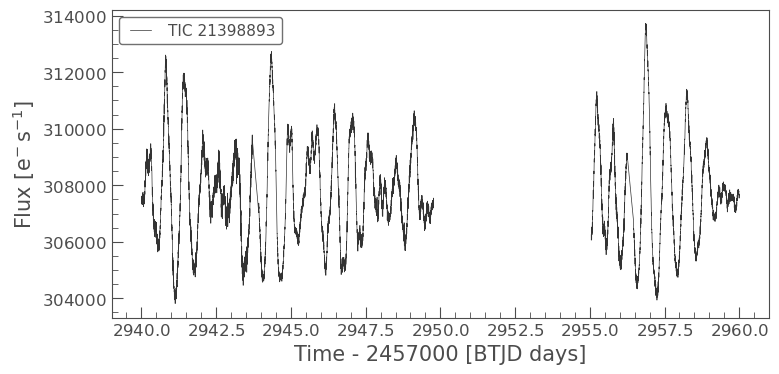

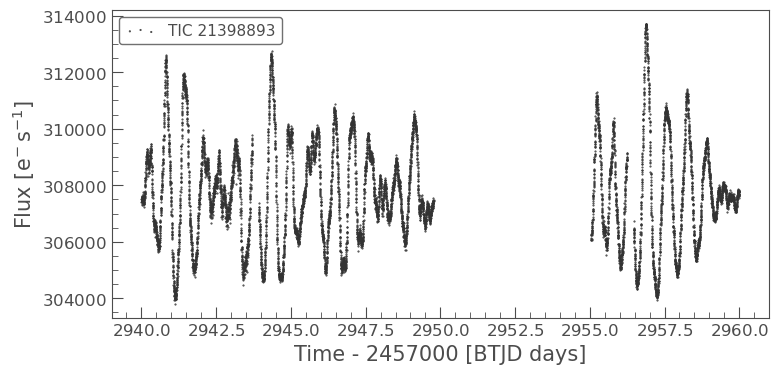

In [229]:
mask = ((lcf[0].time.value < 2965)&(lcf[0].time.value > 2940))
masked_lc=lcf[0][mask];
masked_lc.plot();
masked_lc.scatter(s=1);

In [230]:
# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

(0.0, 2420732.433638)

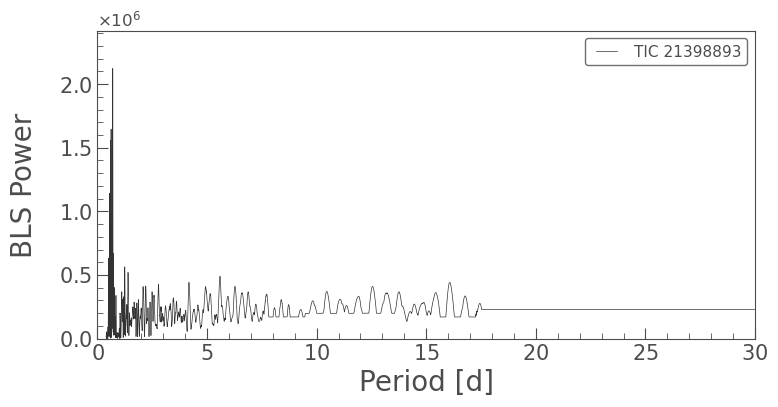

In [231]:
# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 30)
plt.ylim([0, 2420732.433638])

In [232]:
# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

In [233]:
# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(9):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')

Period at 1th max power = 0.697186971869718786 d
BLS max power = 2122930.092313
Epoch max power = 2459940.485197
----------------------------------------
Period at 2th max power = 0.697482974829748414 d
BLS max power = 2121437.618699
Epoch max power = 2459940.480197
----------------------------------------
Period at 3th max power = 0.696890968909689157 d
BLS max power = 2120283.155189
Epoch max power = 2459940.485197
----------------------------------------
Period at 4th max power = 0.696594965949659528 d
BLS max power = 2117993.103549
Epoch max power = 2459940.490197
----------------------------------------
Period at 5th max power = 0.697778977789777932 d
BLS max power = 2115409.784500
Epoch max power = 2459940.480197
----------------------------------------
Period at 6th max power = 0.698074980749807561 d
BLS max power = 2113024.601285
Epoch max power = 2459940.470197
----------------------------------------
Period at 7th max power = 0.696298962989629899 d
BLS max power = 2108625.138

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(306250.0, 310000.0)

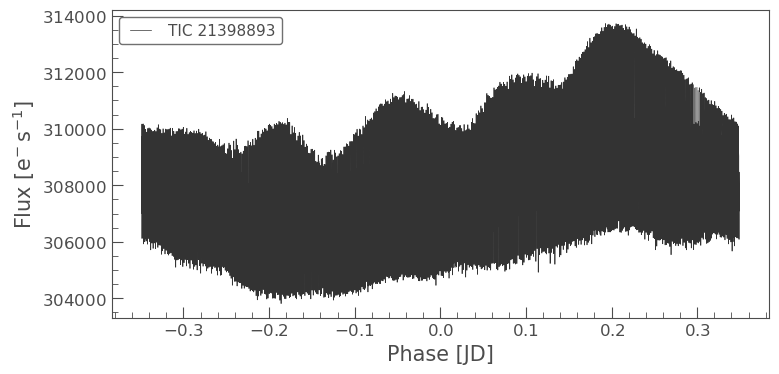

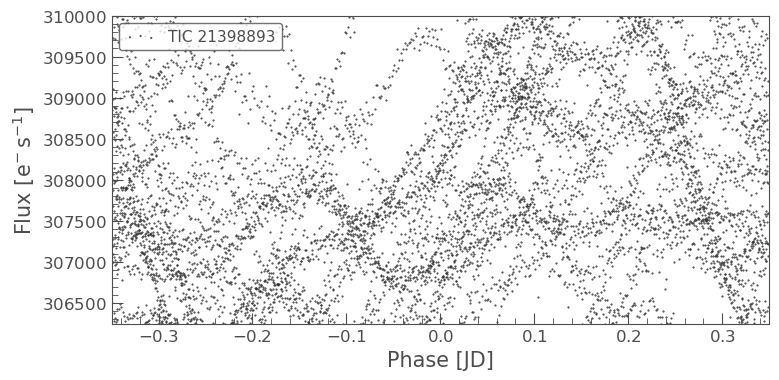

In [317]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue= 0.698074980749807561
epochtime = 2459939.071275
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=1)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-0.35,0.35)
plt.ylim([306250,310000])

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(306250.0, 310000.0)

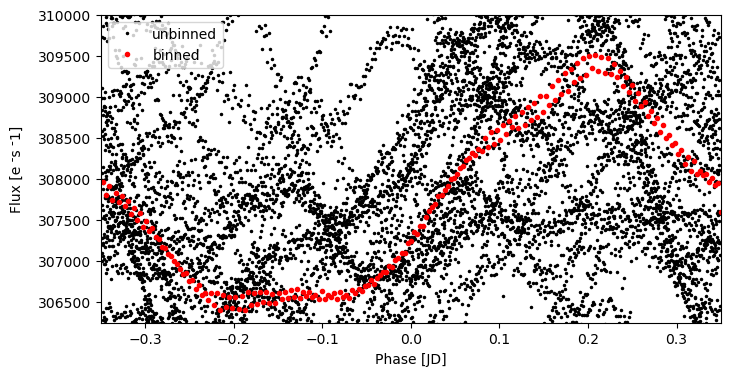

In [318]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-0.35,0.35)
plt.ylim([306250,310000])

In [303]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  306401.0 electron / s
median flux = 307678.765625 electron / s
Tdepth =  1277.765625 electron / s
Tdepth in ppm =  1277765625.0 electron / s ppm
Rp/Rs ratio =  35.74584766095217 electron(1/2) / s(1/2)


In [304]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [305]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 7.92 d hours


In [306]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  1792.8757940226951 electron / s
depth in ppm = 1792875794.022695 electron / s ppm


In [307]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

0.6971869718697188 d
2940.4851974608296
0.33 d


In [308]:
P = 1.671036710367103773 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 1.23 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 4417230161.778646 m
a = 4417230.1617786465 km
a = 0.029527359315433436 AU
The planetary mass was neglected


In [309]:
L = 7.333051 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 2.5819391937069316 AU
The outer boundary of the habitable zone ro = 3.719670050289255 AU


In [310]:
Rs = 1.84488 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 45921394.316992395 electron(1/2) / s(1/2) km
Rp= 7207.87856176305 electron(1/2) / s(1/2) Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 3.4384329743201074


In [311]:
P = 3.8770507705077053 * 24 * 60 * 60
pi = math.pi
a = 5388848826.434916 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 101078.93052473203 m/s


In [312]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  0.6971869718697188 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  7.92 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  1277.765625 electron / s
Transit depth in ppm =  1277765625.0 electron / s ppm
Transit Depth from bls model in ppm = 1792875794.022695 electron / s ppm
Rp/Rs ratio =  35.74584766095217 electron(1/2) / s(1/2)
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 45921394.316992395 electron(1/2) / s(1/2) km
Rp= 7207.87856176305 electron(1/2) / s(1/2) Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 5388848826.434916 m
a = 5388848.826434916 km
a = 0.036022228810152095 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 3.4384329743201074
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 101078.93052473203 m/s
- - - - - - - - - - - - - - - - - - - - 


In [313]:
import cmath
import astropy.units as u
from astropy.constants import R_sun

#Calculation of total transit duration Tt
Tt = ((((4 * period **(2) * Tdepth ** (1/2))/(math.pi ** 2)) * (((Rs*Rsun)/(a/1000))**(2))) + (planet_b_dur ** (2))) ** (1/2)
print('Total transit duration T14 Tt =', Tt)
print('Tt in hours =', Tt * 24 * u.hr)

#Calculation of the impact parameter b for eccentricity e=0
b = abs(( ((1-cmath.sqrt(Tdepth))**(2)-(planet_b_dur/Tt)**(2)) * (1+cmath.sqrt(Tdepth))**(2)  ) / cmath.sqrt(1 - (planet_b_dur/Tt)**(2) ))
print('Impact parameter b =', b)

#Calculation of inclination
i = cmath.acos(b*(Rs*R_sun)/(a*u.km))
print('Inclination i =', (90 - i.real*u.rad).to(u.deg))

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

In [ ]:
lk.show_citation_instructions()